In [1]:
# Importamos las librer√≠as que ser√°n necesarias para el proyecto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest



In [2]:
# Visualizaci√≥n del dataset y obtenci√≥n de informaci√≥n de sus variables
df = pd.read_csv('../data/raw/bank-full.csv', sep=';')

def explore_bank_data (df):
    """
    Carga el dataset de marketing bancario,
    """
    display(df.head())
    df = df.rename(columns={'y': 'fixed_term_deposit'})
    display(df.info())
    display(df.describe().round(2))
    display(df.isnull().sum())
    return df

df = df.rename(columns={'y': 'fixed_term_deposit'})

explore_bank_data(df)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
3  unknown    5   may        92         1     -1         0  unknown   
4  unknown    5   may       198         1     -1         0  unknown   

  fixed_term_deposit  
0                 no  
1                 no  
2                 no  
3                 no  
4                 no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 45211 non-null  int64 
 1   job                 45211 non-null  object
 2   marital             45211 non-null  object
 3   education           45211 non-null  object
 4   default             45211 non-null  object
 5   balance             45211 non-null  int64 
 6   housing             45211 non-null  object
 7   loan                45211 non-null  object
 8   contact             45211 non-null  object
 9   day                 45211 non-null  int64 
 10  month               45211 non-null  object
 11  duration            45211 non-null  int64 
 12  campaign            45211 non-null  int64 
 13  pdays               45211 non-null  int64 
 14  previous            45211 non-null  int64 
 15  poutcome            45211 non-null  object
 16  fixed_term_deposit  45

None

age    balance       day  duration  campaign     pdays  previous
count  45211.00   45211.00  45211.00  45211.00  45211.00  45211.00  45211.00
mean      40.94    1362.27     15.81    258.16      2.76     40.20      0.58
std       10.62    3044.77      8.32    257.53      3.10    100.13      2.30
min       18.00   -8019.00      1.00      0.00      1.00     -1.00      0.00
25%       33.00      72.00      8.00    103.00      1.00     -1.00      0.00
50%       39.00     448.00     16.00    180.00      2.00     -1.00      0.00
75%       48.00    1428.00     21.00    319.00      3.00     -1.00      0.00
max       95.00  102127.00     31.00   4918.00     63.00    871.00    275.00

age                   0
job                   0
marital               0
education             0
default               0
balance               0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
fixed_term_deposit    0
dtype: int64

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      fixed_term_deposit  
0                     no  
1                     no  
2                     no  
3                     no  
4                     no  
...                  ...  
45206                yes  
45207                yes  
45208                yes  
45209                 no  
45210                 no  

[45211 rows x 17 columns]

In [3]:
"""
Vemos que el dataset obtenido no tiene valores nulos, contiene variables cualitativas y cuantitativas
"""

'\nVemos que el dataset obtenido no tiene valores nulos, contiene variables cualitativas y cuantitativas\n'

## Analizar el comportamiento y distribuci√≥n de las variables

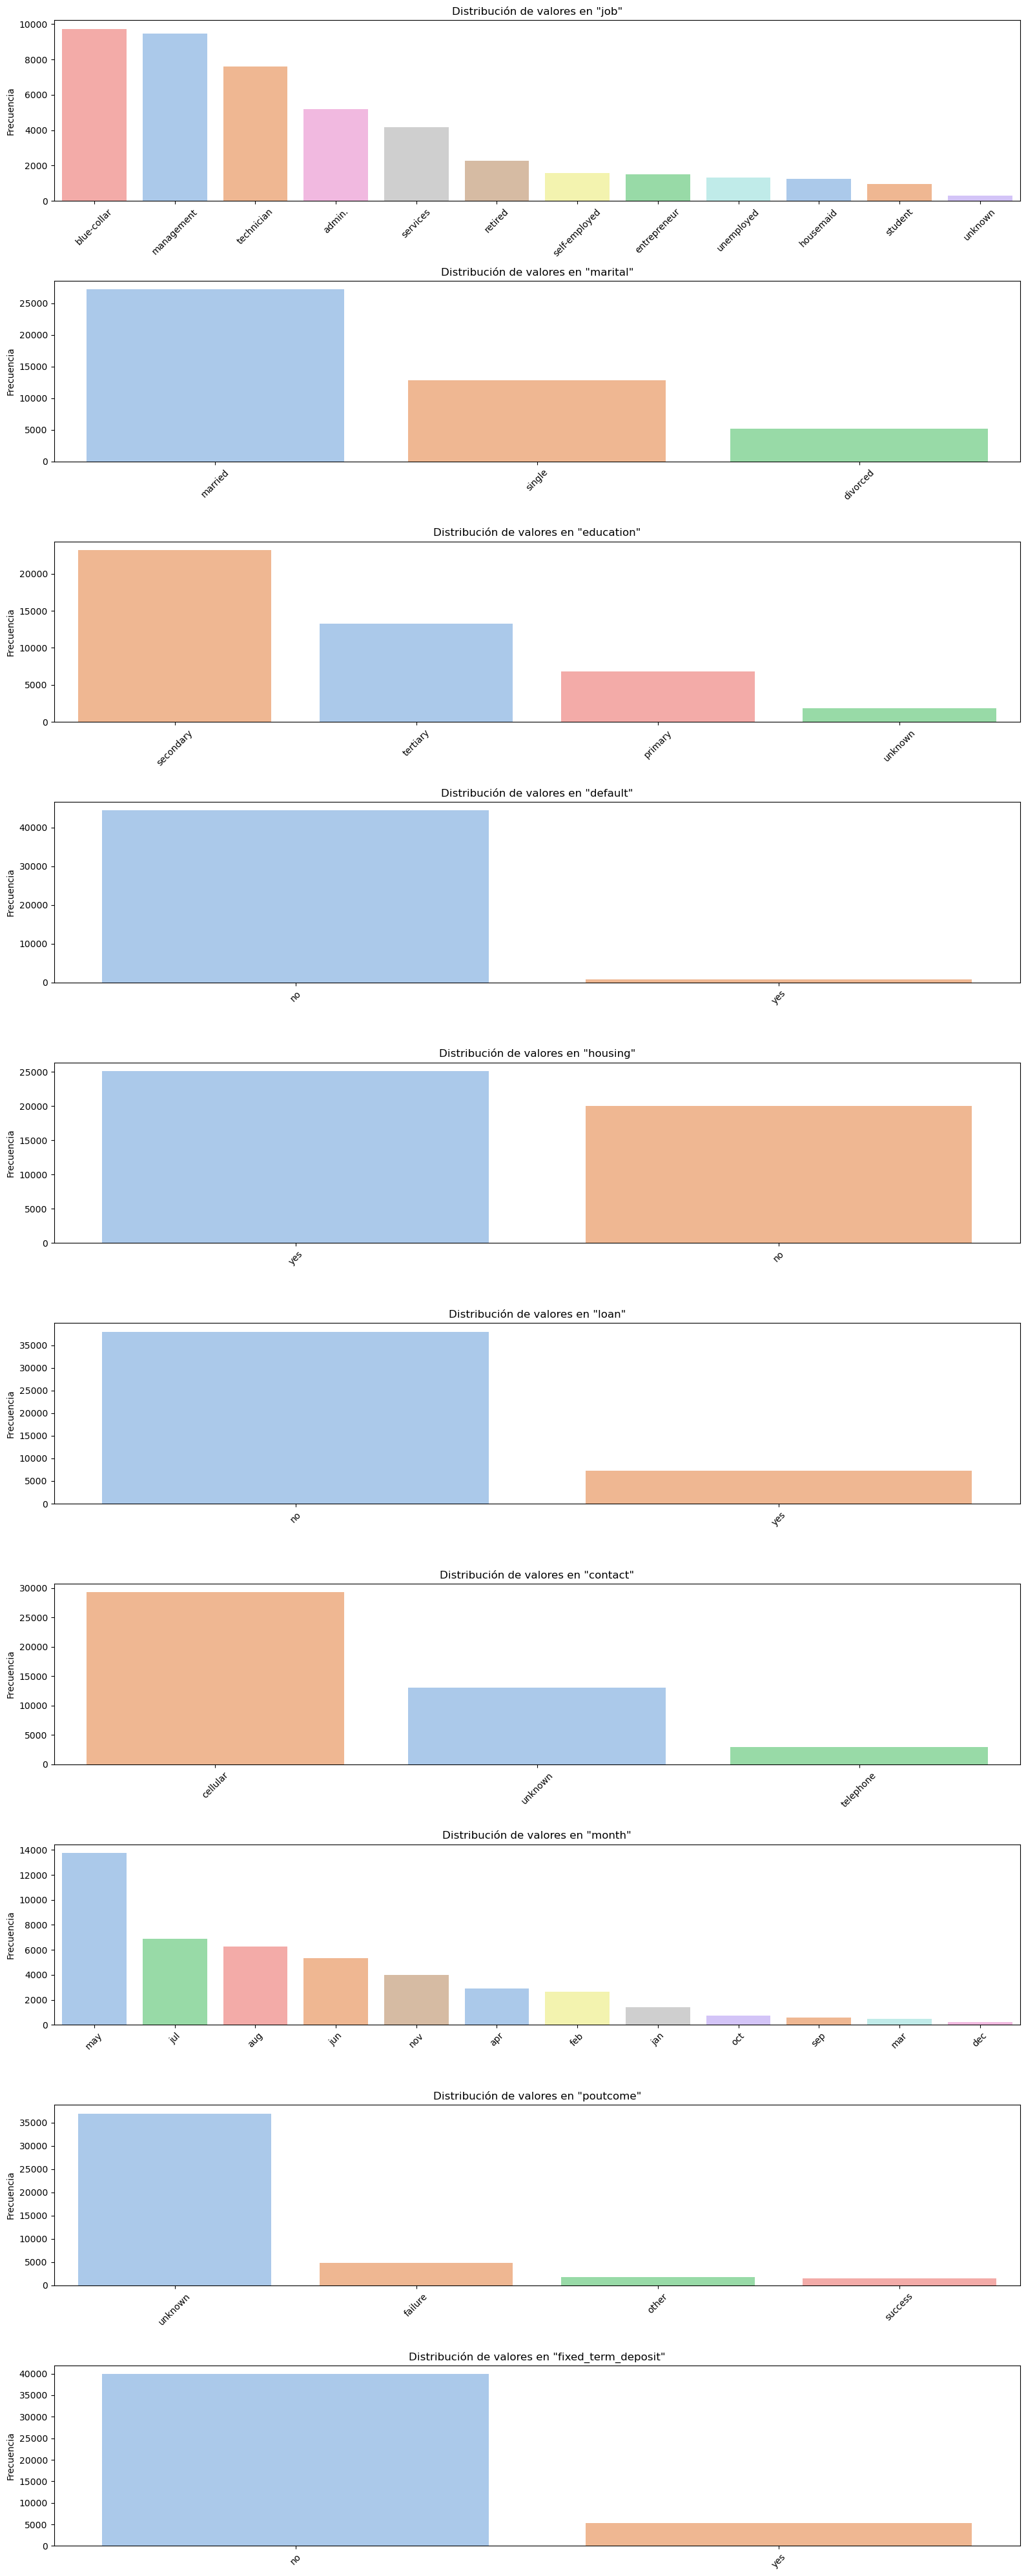

In [6]:
# Funcion para visualizar la distribuci√≥n de las variables cuantitativas

def plot_categorical_distributions(df):
    """
    Genera una visualizaci√≥n de la distribuci√≥n de las variables categ√≥ricas
    en un DataFrame utilizando countplots de Seaborn.
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:
        print("No se encontraron columnas categ√≥ricas en el DataFrame.")
        return

    plt.figure(figsize=(16, len(categorical_cols) * 4))

    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(len(categorical_cols), 1, i)
        sns.countplot(
            data=df,
            x=col,
            hue=col,                
            palette='pastel',
            order=df[col].value_counts().index,
            legend=False            
        )
        plt.title(f'Distribuci√≥n de valores en "{col}"')
        plt.xlabel('')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_categorical_distributions(df)

Los valores Unknown de studies y job no me aportan informaci√≥n por ello se eliminaran del modelo

In [7]:
total = len(df)
unknowns = (df['job'] == 'unknown').sum()
percentage = round((unknowns / total) * 100, 2)

print(f"'unknown' representa el {percentage}% de los datos.")


'unknown' representa el 0.64% de los datos.


In [8]:
def drop_unknown(df, columns):
    """ 
    Eliminamos los valores unknown de las columnas elegidas
    """

    for col in columns:
        df= df[df[col] != 'unknown']
    return df
    
df = drop_unknown(df, ['job', 'education'])
# df.head()

In [9]:
def map_education_level(df):
    """
    Crea una nueva columna 'education_level' que aclara el nivel de estudios
    a partir de la columna 'education'.
    """
    education_map = {
        'primary': 'Primary',
        'secondary': 'High School/VET',
        'tertiary': 'Grade/Higher VET',
        'unknown': 'unknown'
    }
    
    df['education_level'] = df['education'].map(education_map)
    return df

df = map_education_level(df)
# display(df)

In [10]:
def group_ages(age):
    """ 
    Se encarga de agrupar rango de edades
    """
    if age <=30:
        return '18 - 30'
    elif age > 30 and age <= 45:
        return '31 - 45'
    elif age > 45 and age <= 65:
        return '46 - 65'
    else: 
        return '66+ '
    
df['age_group'] = df['age'].apply(group_ages)
    

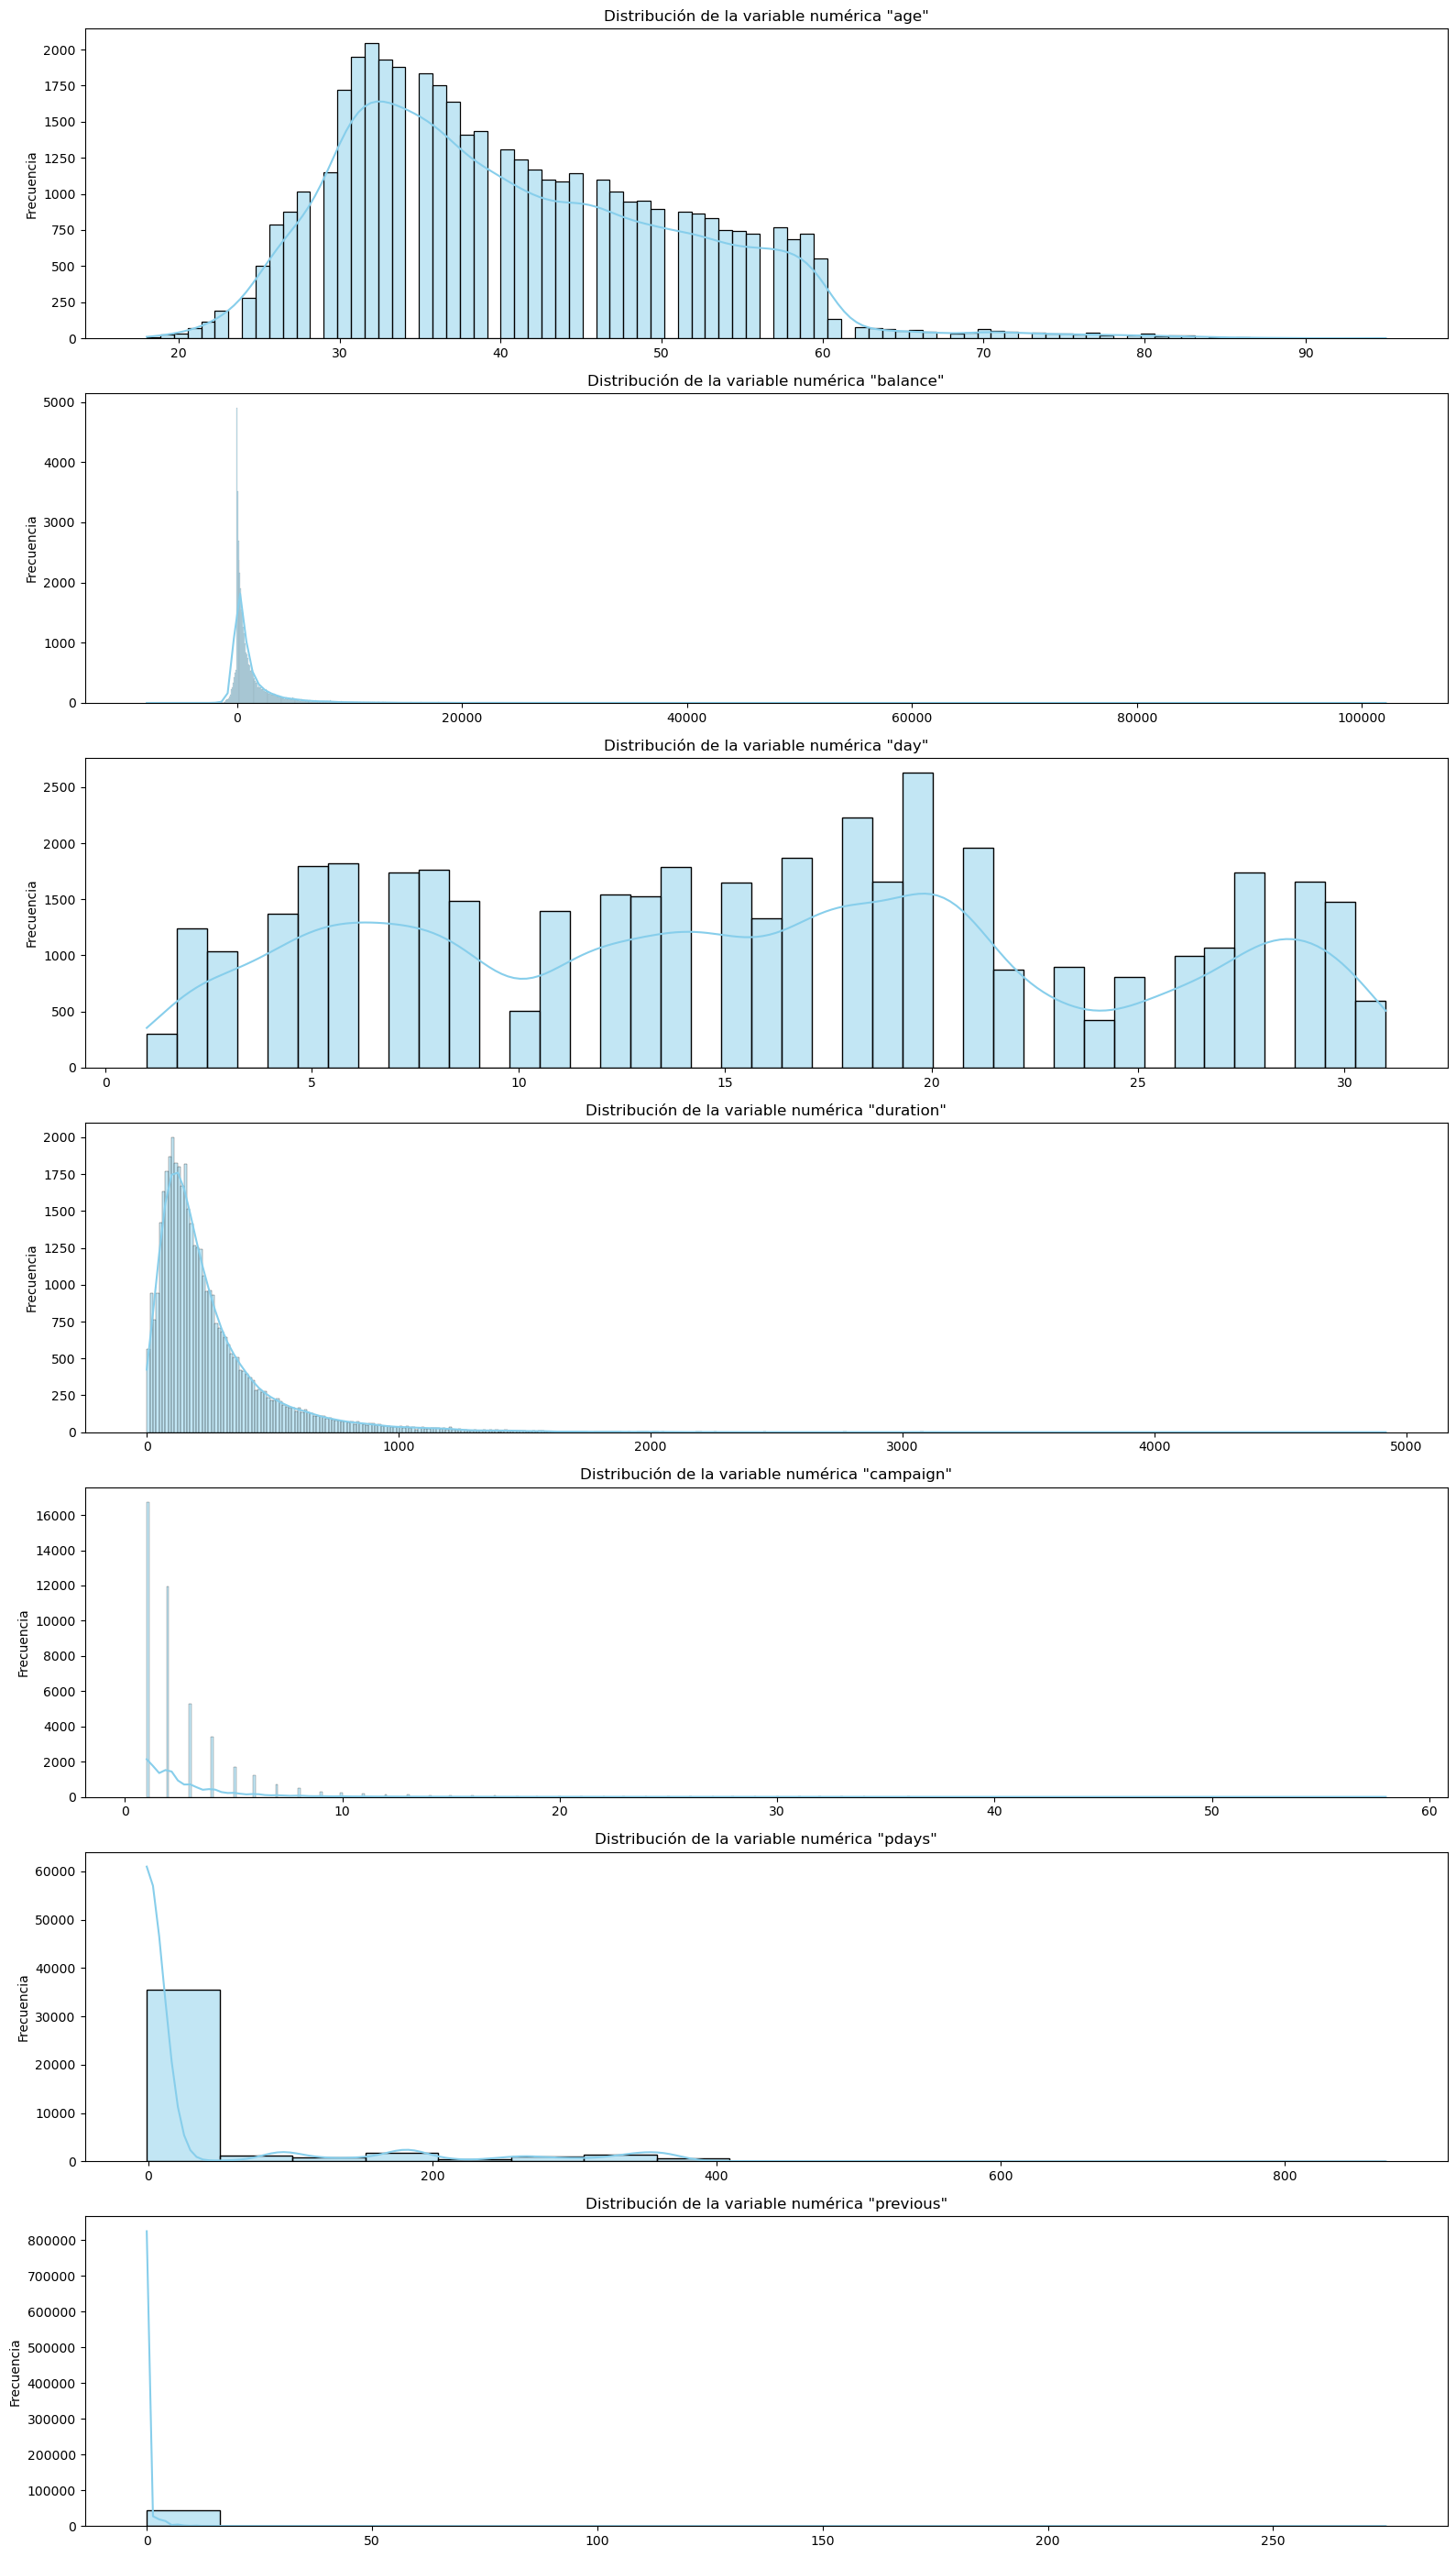

In [52]:
def plot_numerical_distributions(df):
    """
    Genera una visualizaci√≥n de la distribuci√≥n de las variables num√©ricas
    en un DataFrame utilizando histogramas de Seaborn.
    """
    numerical_cols = df.select_dtypes(include=['number']).columns

    if len(numerical_cols) == 0:
        print("No se encontraron columnas num√©ricas en el DataFrame.")
        return

    plt.figure(figsize=(16, len(numerical_cols) * 4))

    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols), 1, i)
        sns.histplot(data=df, x=col, kde=True, color='skyblue')
        plt.title(f'Distribuci√≥n de la variable num√©rica "{col}"')
        plt.xlabel('')
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

plot_numerical_distributions(df)

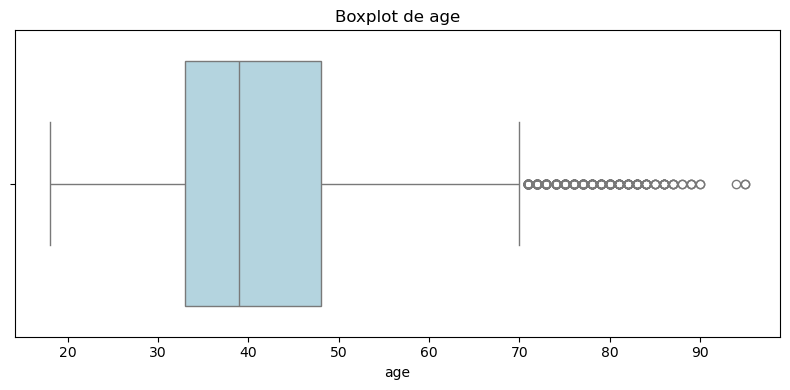

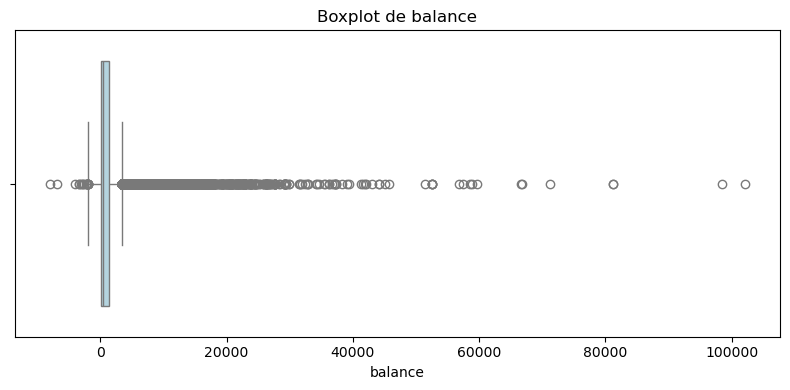

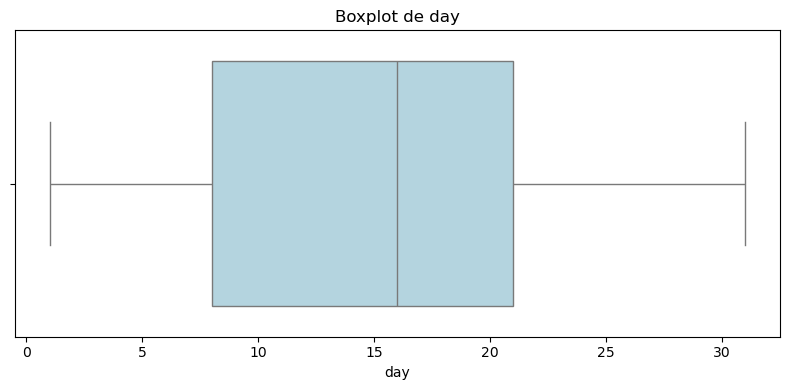

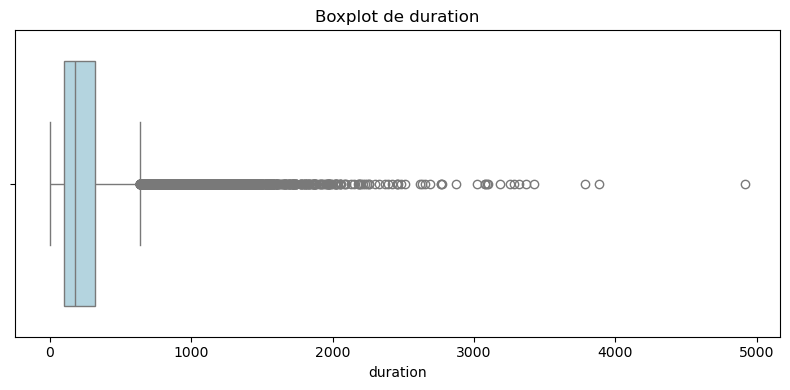

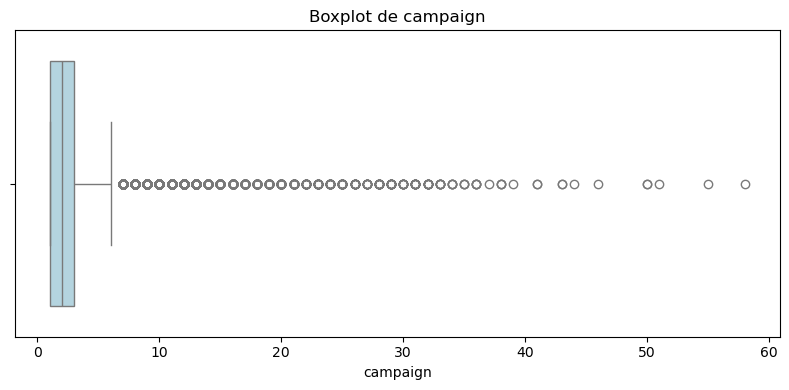

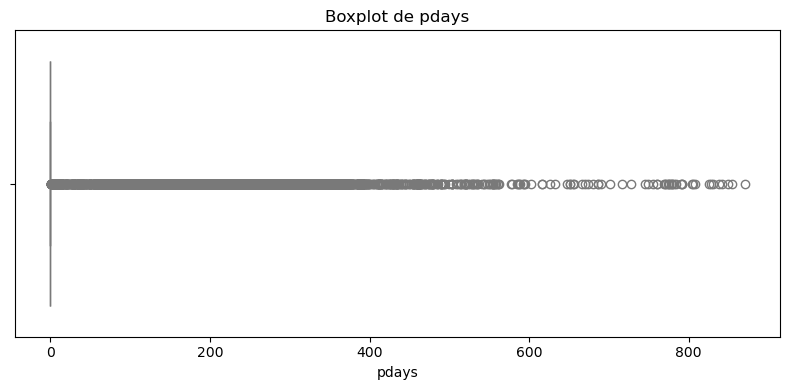

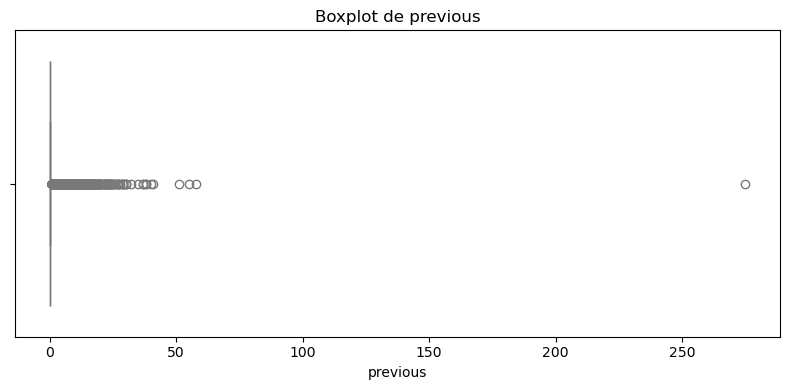

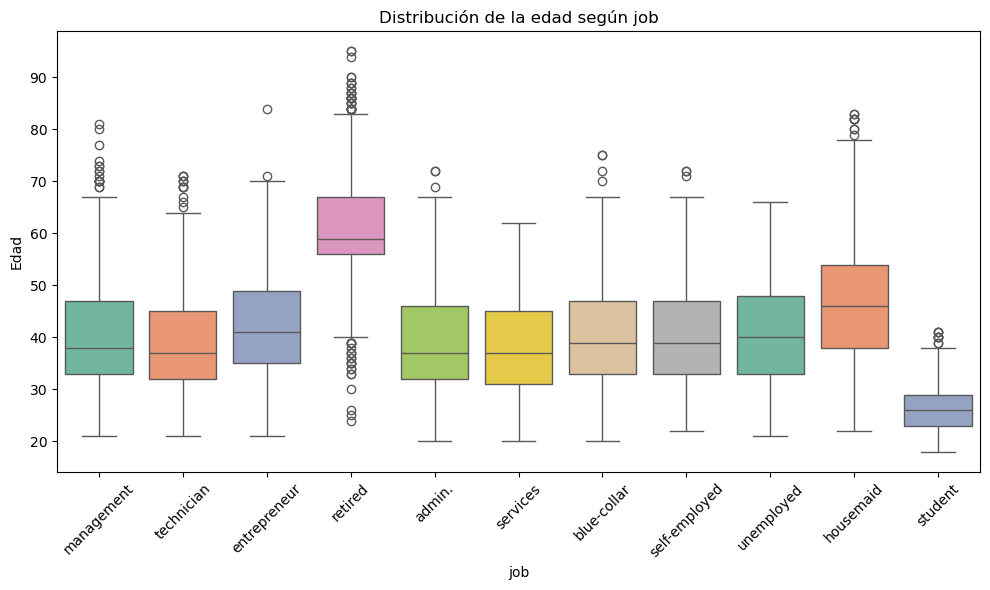

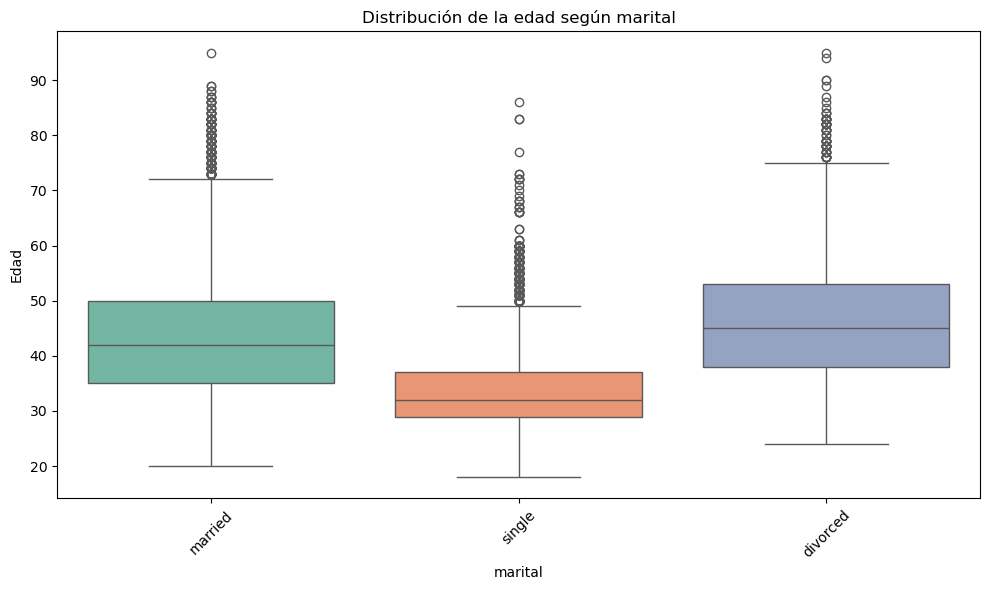

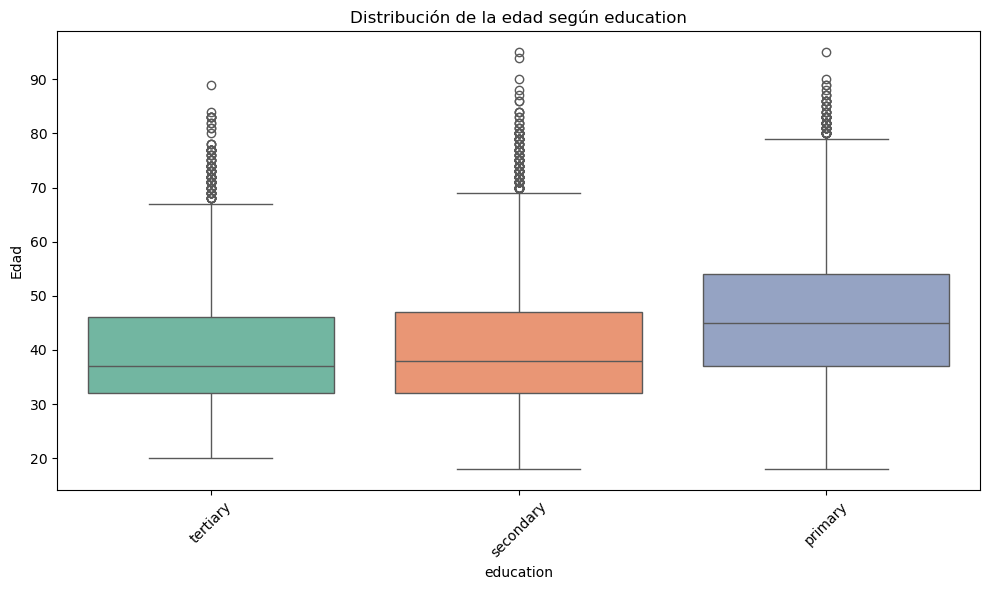

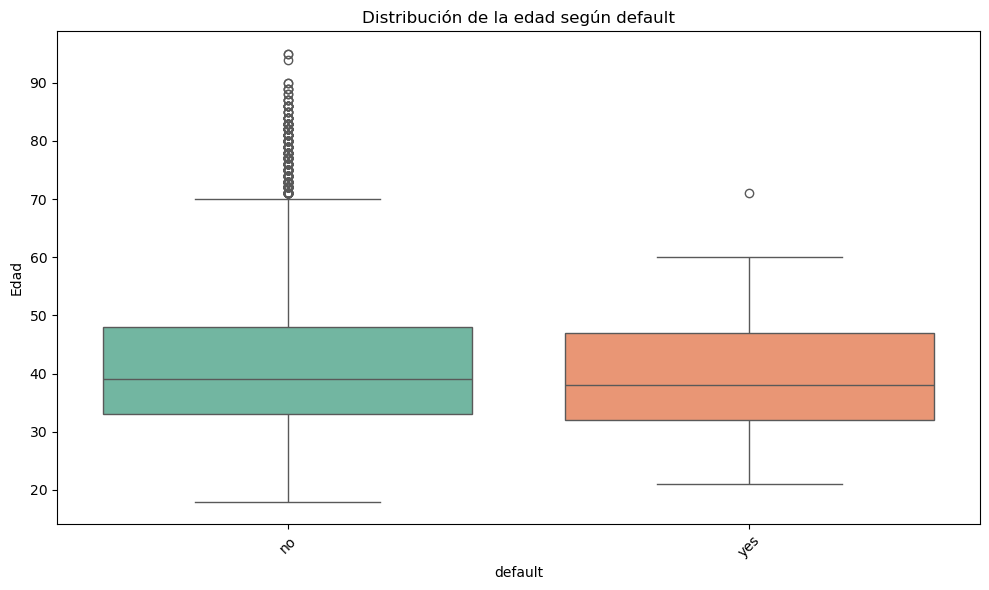

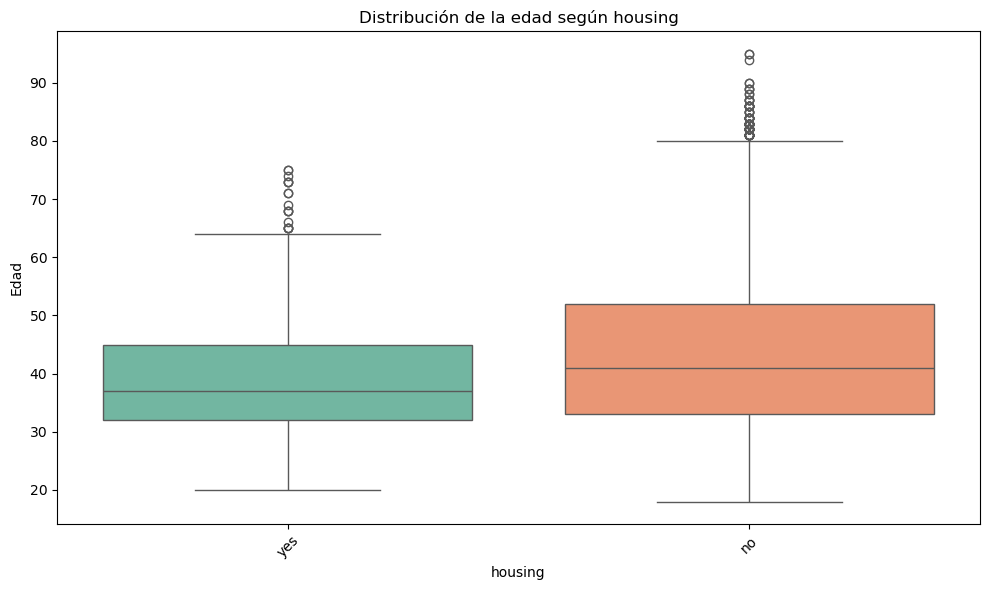

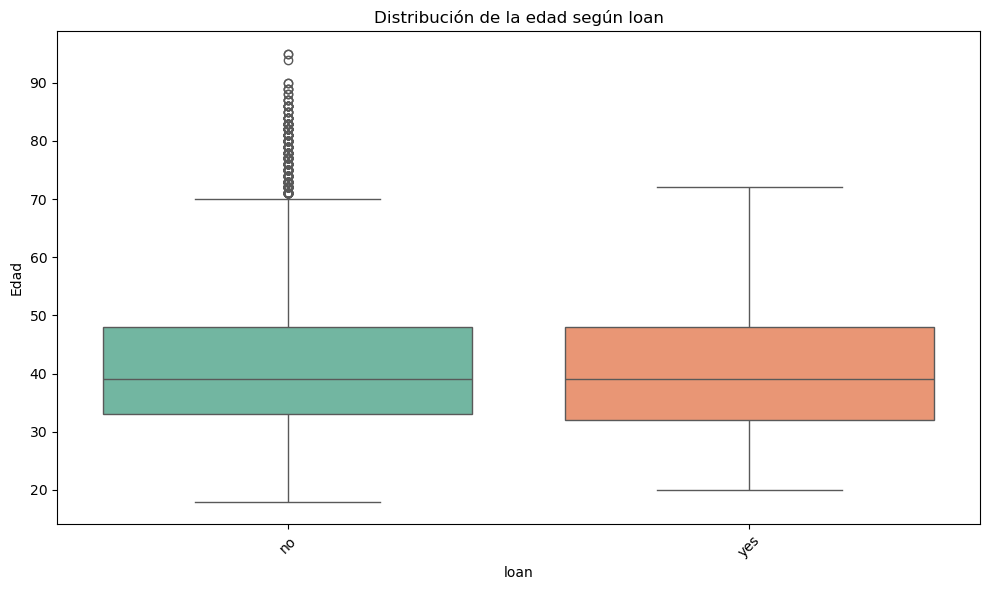

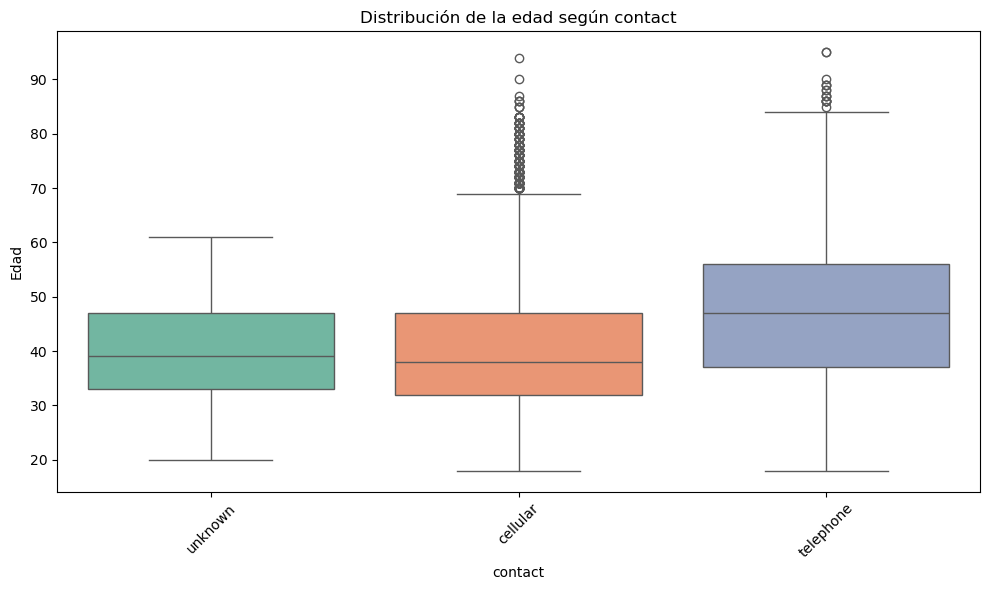

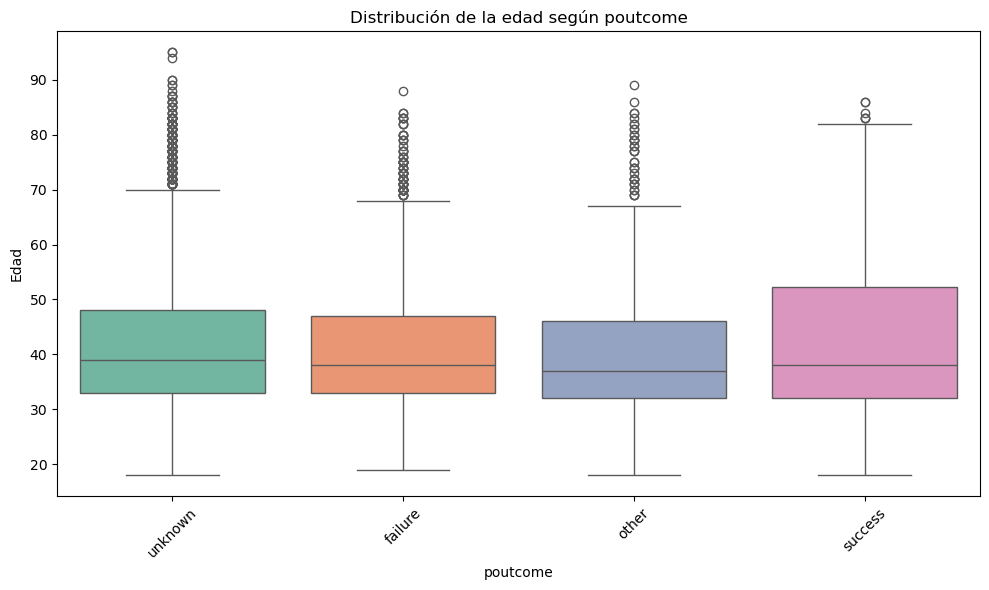

‚ùå La columna 'y' no est√° presente en el DataFrame. Saltando...


In [53]:
def plot_individual_boxplots(df):
    """
    Genera boxplots individuales:
    - Uno por cada variable num√©rica (distribuci√≥n simple).
    - Uno por cada variable categ√≥rica cruzada con 'age' (distribuci√≥n por grupo).
    """
    numerical_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'poutcome', 'y']

    # 1. Boxplots de variables num√©ricas
    if len(numerical_vars) == 0:
        print("No se encontraron columnas num√©ricas en el DataFrame.")
    else:
        for col in numerical_vars:
            if col in df.columns:
                plt.figure(figsize=(8, 4))
                sns.boxplot(x=df[col], color='lightblue')
                plt.title(f'Boxplot de {col}')
                plt.xlabel(col)
                plt.tight_layout()
                plt.show()
            else:
                print(f"‚ùå La columna '{col}' no est√° presente en el DataFrame. Saltando...")

    # 2. Boxplots cruzando categ√≥ricas con 'age'
    if 'age' not in df.columns:
        print("‚ùå La columna 'age' no est√° presente en el DataFrame. No se pueden graficar boxplots por grupo.")
        return

    if len(categorical_vars) == 0:
        print("No se encontraron columnas categ√≥ricas en el DataFrame.")
    else:
        for cat in categorical_vars:
            if cat not in df.columns:
                print(f"‚ùå La columna '{cat}' no est√° presente en el DataFrame. Saltando...")
                continue

            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=cat, y='age', hue=cat, palette='Set2')
            plt.title(f'Distribuci√≥n de la edad seg√∫n {cat}')
            plt.xlabel(cat)
            plt.ylabel('Edad')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


plot_individual_boxplots(df)


In [13]:
# Analizamos la relacion o el comportamiento que puede haber entre cada variable cuantitativa con la variable edad e
def plot_boxplot_with_y(df):
    """
    Genera boxplots individuales:
    - Uno por cada variable categ√≥rica cruzada con 'age' y la variable 'y'
    """
    categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan']
    
    if len(categorical_vars) == 0:
        print('No se encontraron columnas categ√≥ricas en el DataFrame')

    else:
        for cat in categorical_vars:
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df, x='y', y='age', hue=cat, palette='Set3')
            plt.title(f'Distribuci√≥n de edad seg√∫n y y segmentado por {cat}')
            plt.xlabel('y')
            plt.ylabel('Edad')
            plt.legend(title=cat, bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()

# plot_boxplot_with_y(df)

In [14]:
# Analizamos la correlaci√≥n entre las variables cuantitativas
# Preparamos la variable para poder realizar la correlaci√≥n
def corr_vars(df): 
    df_corr = df.copy()
    df_corr['fixed_term_deposit'] = df_corr['fixed_term_deposit'].map({'no': 0, 'yes': 1})
    num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'fixed_term_deposit']

    corr_matrix = df_corr[num_cols].corr()
    # Gr√°fico de barras horizontales
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=0.5)

    plt.title('Matriz de correlaci√≥n entre variables num√©ricas y la variable objetivo (fixed_term_deposit)')
    plt.tight_layout()
    plt.show()

# corr_vars(df)

Obtenemos que no existe mucha correlaci√≥n entre las variables con respecto a la variable 'fixed_term_deposit' --> ¬øque pasa si separamos los valores de Si y analizamos como se comportan?

In [15]:
def yes_ftd(df):
    """ 
    Devuelve un nuevo DataFrame (df_fxt) con los registros de personas
    que aceptaron el dep√≥sito a plazo fijo (fixed_term_deposit == 'yes')
    """
    return df[df['fixed_term_deposit'] == 'yes']

df_yes_ftd =yes_ftd(df)
# display(df_yes_ftd)

In [16]:
def corr_matrix_yes_clients(df_yes):
    """
    Calcula y muestra la matriz de correlaci√≥n de las variables num√©ricas
    para los clientes que aceptaron el dep√≥sito a plazo fijo.

    Par√°metros:
    -----------
    df_yes : pd.DataFrame
        DataFrame filtrado con clientes que dijeron 'yes' en 'fixed_term_deposit'.
    """
    # Seleccionamos variables num√©ricas
    num_df = df_yes.select_dtypes(include='number')

    # Calculamos la matriz de correlaci√≥n
    corr = num_df.corr()

    # Visualizamos con un heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
    plt.title("Matriz de correlaci√≥n (clientes que aceptaron el dep√≥sito)")
    plt.tight_layout()
    plt.show()

# corr_matrix_yes_clients(df_yes_ftd)



¬øY las variables de las personas que no lo aceptaron?

In [17]:
def no_ftd(df):
    """ 
    Devuelve un nuevo DataFrame (df_fxt) con los registros de personas
    que no aceptaron el dep√≥sito a plazo fijo (fixed_term_deposit == 'no')
    """
    return df[df['fixed_term_deposit'] == 'no']

df_no_ftd =no_ftd(df)
# display(df_no_ftd)

In [18]:
def corr_matrix_no_clients(df_no):
    """
    Calcula y muestra la matriz de correlaci√≥n de las variables num√©ricas
    para los clientes que NO aceptaron el dep√≥sito a plazo fijo.

    Par√°metros:
    -----------
    df_no : pd.DataFrame
        DataFrame filtrado con clientes que dijeron 'no' en 'fixed_term_deposit'.
    """
    # Seleccionamos solo columnas num√©ricas
    num_df = df_no.select_dtypes(include='number')

    # Calculamos la matriz de correlaci√≥n
    corr = num_df.corr()

    # Visualizamos la matriz como heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
    plt.title("Matriz de correlaci√≥n (clientes que NO aceptaron el dep√≥sito)")
    plt.tight_layout()
    plt.show()

# corr_matrix_no_clients(df_no_ftd)


## Realizamos an√°lisis sobre como se comportan las variables tanto para los valores de la variable: fixed_term_deposit --> 'yes' y 'no'

In [19]:
def plot_columns(df):
    """
    Crea gr√°ficos de barras para cada columna puesta en la lista .
    """

    columnas_a_graficar = ['age', 'job', 'marital', 'education', 'default',
                           'housing', 'loan', 'contact', 'day']
    for col in columnas_a_graficar:
        conteo = df[col].value_counts()
        plt.figure(figsize=(8, 4))
        conteo.plot(kind='bar')
        plt.title(f'Distribuci√≥n de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

# Uso:
# plot_columns(df_yes_ftd)

Para poder realizar un mayor analisis de la variable edad lo voy a agrupar por rangos de edad

In [20]:
# # Aplica la funci√≥n y guarda el resultado en una nueva columna
# df['age_group'] = df['age'].apply(group_ages)
# df_yes_ftd['age_group'] = df['age'].apply(group_ages)
# df_no_ftd['age_group'] = df['age'].apply(group_ages)
# # display(df_no_ftd)

In [21]:
def plot_age_group(df, col):
    """
    Crea un gr√°fico de barras para una columna del DataFrame.
    """
    conteo = df[col].value_counts().sort_index()  # ordenamos los grupos si son tipo texto
    plt.figure(figsize=(8, 4))
    conteo.plot(kind='bar')
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# plot_age_group(df_yes_ftd, 'age_group') # Para los que lo aceptaron
# plot_age_group(df_no_ftd, 'age_group') # Para los que no

In [22]:
def info_cualitative_vars(df, columns):

    """ 
    Genera la media, moda y mediana de las variables cualitativas
    """
    mean =df[columns].mean()
    median = df[columns].median()
    mode = df[columns].mode()[0]

    print(f'Estad√≠sticos para {columns}')
    print(f'Media: {mean}')
    print(f'Mediana: {median}')
    print(f'Moda: {mode}')

# info_cualitative_vars(df_yes_ftd, 'age')
# info_cualitative_vars(df_no_ftd, 'age')

In [23]:
""" 
Se puede apreciar como la edad tanto de las personas que aceptan como las que rechazan el producto, a pesar de que hay un volumen mayor de personas que han rechazo el producto.
"""

' \nSe puede apreciar como la edad tanto de las personas que aceptan como las que rechazan el producto, a pesar de que hay un volumen mayor de personas que han rechazo el producto.\n'

In [24]:
def frequency_vars (df, columns):
    """ 
    Funci√≥n que muestra cual es el valor que m√°s y menos se repite de una variable
    """
    frequency = df[columns].value_counts()
    most_frequent_value = frequency.idxmax()
    least_frequent_value = frequency.idxmin()

    print(f'El valor m√°s usual: {most_frequent_value}')
    print(f'El valor que menos se repite: {least_frequent_value}')

# frequency_vars(df_yes_ftd, ['job', 'marital', 'education_level', 'month', 'loan', 'default'])
# frequency_vars(df_no_ftd, ['job', 'marital', 'education', 'month', 'loan', 'default'])

In [25]:
""" 
A nivel de cantidad
Vemos que los valores m√°s frecuentes a la hora de aceptar los dep√≥sitos a plazo fijo has sido los managers 
(personas que trabajan en puestos de gesti√≥n o direcci√≥n), personas casadas, con niveles altos de estudios, en el mes de agosto, sin pr√©stamos bancarios
ni pr√©stamos en mora, mientras el perfil que menos ha aceptado el producto son desempleados, solteros, con estudios secundarios y sin pr√©stamos en mora ni bancarios
"""

' \nA nivel de cantidad\nVemos que los valores m√°s frecuentes a la hora de aceptar los dep√≥sitos a plazo fijo has sido los managers \n(personas que trabajan en puestos de gesti√≥n o direcci√≥n), personas casadas, con niveles altos de estudios, en el mes de agosto, sin pr√©stamos bancarios\nni pr√©stamos en mora, mientras el perfil que menos ha aceptado el producto son desempleados, solteros, con estudios secundarios y sin pr√©stamos en mora ni bancarios\n'

In [26]:
def ratio_vars(df, columns):
    """
    Devuelve los valores m√°s y menos frecuentes de m√∫ltiples columnas categ√≥ricas.
    """
    result = {}
    for col in columns:
        ratios = (df[col].value_counts(normalize= True) * 100).round(2).sort_values(ascending= False)
        print(f'Las proporciones de la variable {col} son: ')
        display(ratios)
        most_frequent_ratio = ratios.idxmax()
        print(f'El ratio m√°s alto es para: {most_frequent_ratio}')
        least_frequent_ratio = ratios.idxmin()
        print(f'El ratio m√°s bajo es para {least_frequent_ratio}')
       
        result[col] = {
            'most_frequent': most_frequent_ratio,
            'least_frequent': least_frequent_ratio
        }
columns = ['job', 'marital', 'education_level', 'month', 'loan', 'default']
# ratio_vars(df_yes_ftd, columns)

In [ ]:
""" 
Esto nos confirma lo dicho perviamente, de cuales son los grupos de perosnas con un mayor nivel de aceptaci√≥n del producto: Vemos que los valores m√°s frecuentes a la hora de aceptar
los dep√≥sitos a plazo fijo has sido los managers (personas que trabajan en puestos de gesti√≥n o direcci√≥n), personas casadas, con niveles altos de estudios, en el mes de agosto, 
sin pr√©stamos bancarios ni pr√©stamos en mora, 
"""

' \nEsto nos confirma lo dicho perviamente, de cuales son los grupos de perosnas con un mayor nivel de aceptaci√≥n del producto: Vemos que los valores m√°s frecuentes a la hora de aceptar\nlos dep√≥sitos a plazo fijo has sido los managers (personas que trabajan en puestos de gesti√≥n o direcci√≥n), personas casadas, con niveles altos de estudios, en el mes de agosto, \nsin pr√©stamos bancarios ni pr√©stamos en mora, \n'

: 

: 

: 

: 

: 

: 

In [27]:
def acceptance_rate_multiple(df, columnas):
    """
    Calcula y muestra el porcentaje de aceptaci√≥n del producto financiero ('yes')
    en funci√≥n de s√≠ mismo, nos dice, dentro de una variable, en cada categor√≠a
    dentro de esta, cual es la proporci√≥n de aceptaci√≥n.
    """
    for columna in columnas:
        print(f"\n Porcentaje de aceptaci√≥n por: {columna.upper()}")

        result = {}

        categories = df[columna].unique()

        for category in categories:
            subset = df[df[columna] == category]
            values = subset['fixed_term_deposit'].value_counts()
            if 'yes' in values:
                percent = (values['yes'] / values.sum()) * 100
            else:
                percent = 0
            result[category] = round(percent, 2)

        result_df = pd.DataFrame.from_dict(result, orient='index', columns=['% aceptaci√≥n'])
        result_df = result_df.sort_values(by='% aceptaci√≥n', ascending=False)
        result_df.reset_index(inplace=True)
        result_df.rename(columns={'index': columna}, inplace=True)

        # Mostrar tabla
        display(result_df)

        # Crear gr√°fico
        plt.figure(figsize=(10, 5))
        sns.barplot(data=result_df, x=columna, y='% aceptaci√≥n', edgecolor='black', palette='Blues')
        plt.title(f'Porcentaje de aceptaci√≥n por {columna}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

columns = ['job', 'marital', 'education_level', 'month', 'loan', 'default']
# acceptance_rate_multiple(df, columns)

# columns = ['job', 'marital', 'education_level', 'month', 'loan', 'default']
# results = def acceptance_rate_multiple(df, columnas):
# plot_aceptation(resultados)       

In [28]:
""" 
Nos da una perspectiva m√°s profunda dentro de cada grupo, para cada categor√≠a de cada uno de ellos, en funci√≥n del n√∫mero de personas a la que se le ha ofrecido 
el producto dentro de cada grupo, que porcentaje con respecto al total de su categor√≠a ha aceptado o no. --> nos sirve porque al no tener la misma cantidad de 
personas en cada grupo, podemos ver el nivel de aceptaci√≥n real por grupo y categor√≠a.
"""

' \nNos da una perspectiva m√°s profunda dentro de cada grupo, para cada categor√≠a de cada uno de ellos, en funci√≥n del n√∫mero de personas a la que se le ha ofrecido \nel producto dentro de cada grupo, que porcentaje con respecto al total de su categor√≠a ha aceptado o no. --> nos sirve porque al no tener la misma cantidad de \npersonas en cada grupo, podemos ver el nivel de aceptaci√≥n real por grupo y categor√≠a.\n'

In [29]:
def plot_job_education_gorup(df):
    
    """ 
    Genera un gr√°fico de barras que muestra la distribuci√≥n de grupos de edad
    por tipo de trabajo y nivel educativo.
    """

    situation_group = df.groupby(['job', 'education_level'])['age_group'].value_counts().sort_values(ascending= False)
    situation_group = situation_group.reset_index(name= 'count')
    
    
    plt.figure(figsize=(16, 6))
    sns.barplot(
        data=situation_group,
        x='age_group',
        y='count',
        hue='job',
        dodge=True,
        errorbar=None,
        edgecolor='black',   
        width=0.8             
    )
    plt.title('Distribuci√≥n de grupos de edad por tipo de trabajo')
    plt.xlabel('Grupo de edad')
    plt.ylabel('Cantidad')
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.tight_layout()
    plt.show()

# plot_job_education_gorup(df_yes_ftd)
# plot_job_education_gorup(df_no_ftd)

In [49]:
columns_job = ['job']
#ratio_vars(df, columns_job)
total_retired =df[df['job'] == 'retired']['fixed_term_deposit'].value_counts()
percent_yes_retired = ((total_retired['yes'] / total_retired.sum()) * 100).round(2)
print(f'EL producto fue aceptado por el {percent_yes_retired}% de jubilados')




EL producto fue aceptado por el 22.66% de jubilados


In [30]:
""" 
A trav√©s del primer gr√°fico se puede deducir que el p√∫blico objetivo de la campa√±a deber√≠a ser las personas que se encuentran entre los 31 a 65 a√±os de edad, personas que se intuyen que 
tienen una mayor estabilidad financiera y pueden querer aumentar sus ahorros en el futuro. Adem√°s se deduce indirectamente que los grupos de personas con mayor nivel de aceptaci√≥n son 
aquellos con unos niveles de estudio superiores dado que los puestos que destacan en el gr√°fico conllevan una mayor cualificaci√≥n como management, technician, admin, blue-collar... 
Mientras que los desempleados, emprendedores, estudiantes y amas de casa no son propensos a aceptar dicho producto.
Adem√°s se debe de tener en cuenta dentro de las personas mayores de 66 a√±os a los retirados, que ha pesar de formar tan solo el 4.97% de la poblaci√≥n total de la campa√±a, forman el 9.68% del
total de personas que aceptaron el producto y la mayor categor√≠a dentro de su rango de edad, siendo un sector en el que se deber√≠a enofcar tambi√©n.
"""

' \nA trav√©s del primer gr√°fico se puede deducir que el p√∫blico objetivo de la campa√±a deber√≠a ser las personas que se encuentran entre los 31 a 65 a√±os de edad, personas que se intuyen que \ntienen una mayor estabilidad financiera y pueden querer aumentar sus ahorros en el futuro. Adem√°s se deduce indirectamente que los grupos de personas con mayor nivel de aceptaci√≥n son \naquellos con unos niveles de estudio superiores dado que los puestos que destacan en el gr√°fico conllevan una mayor cualificaci√≥n como management, technician, admin, blue-collar... \nMientras que los desempleados, emprendedores, estudiantes y amas de casa no son propensos a aceptar dicho producto.\nAdem√°s se debe de tener en cuenta dentro de las personas mayores de 66 a√±os a los retirados, que ha pesar de formar tan solo el 4.97% de la poblaci√≥n total de la campa√±a, forman el 9.68% del\ntotal de personas que aceptaron el producto y la mayor categor√≠a dentro de su rango de edad, siendo un sector en el

In [31]:
def plot_average_balance_by_job(df):
    """
    Genera un gr√°fico de barras con el balance promedio por tipo de trabajo.
    """
    plot_job_balance = df.groupby('job')['balance'].mean().sort_values(ascending=False)
    print(f'üî∫El grupo con mayor renta media es: {plot_job_balance.idxmax()}')
    print(f'üîªEl grupo con menor renta media es: {plot_job_balance.idxmin()}')    
    print(plot_job_balance.head())

    plt.figure(figsize=(10, 6))
    plot_job_balance.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Balance promedio por tipo de trabajo')
    plt.ylabel('Balance promedio (‚Ç¨)')
    plt.xlabel('Tipo de trabajo')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# plot_average_balance_by_job(df_yes_ftd)
# plot_average_balance_by_job(df)
# plot_average_balance_by_job(df_no_ftd)


In [32]:
""" 
Con estas gr√°ficas se refleja que el producto financiero ha sido aceptado por las personas que poseen un mayor poder adquisitivo dado que refleja la renta media del 
individuo que acept√≥, que no y ambos, encontrandose los valores medios de renta m√°s altos en el grupo de qeu si lo aceptaron, esto refleja una correlaci√≥n positiva entre el balance promedio 
y la aceptaci√≥n del producto financiero. Aunque ciertos trabajos tienen balances altos en general, su relaci√≥n con la aceptaci√≥n var√≠a ligeramente. 
"""

' \nCon estas gr√°ficas se refleja que el producto financiero ha sido aceptado por las personas que poseen un mayor poder adquisitivo dado que refleja la renta media del \nindividuo que acept√≥, que no y ambos, encontrandose los valores medios de renta m√°s altos en el grupo de qeu si lo aceptaron, esto refleja una correlaci√≥n positiva entre el balance promedio \ny la aceptaci√≥n del producto financiero. Aunque ciertos trabajos tienen balances altos en general, su relaci√≥n con la aceptaci√≥n var√≠a ligeramente. \n'

In [33]:
def scatter_balance_by_job(df):
    """
    Crea un gr√°fico de dispersi√≥n entre edad y balance, coloreando por tipo de trabajo (u otra variable).
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='job', y='balance', hue='job') 
    plt.title('Relaci√≥n entre trabajo y balance por tipo de trabajo')  
    plt.xlabel('Job')
    plt.ylabel('Balance (‚Ç¨)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# scatter_balance_by_job(df_yes_ftd)
# scatter_balance_by_job(df_no_ftd)

In [34]:
"""
Confirma que a pesar de contar el dataset con en algunos tipos de trabajo con una renta mayor en las personas que no aceptaron con respecto a las que si, 
en proporci√≥n como se ha reflejado previamente, el dataset con las personas que no aceptaron el producto cuenta con una mayor cantidad de estos con respecto a los que si aceptaron, por ello
al obtener las medias y ver como de dispersos se encuentran los datos nos confirma que hay un mayor nivel de aceptaci√≥n del producto de ahorro para las personas con mayor renta.
"""

'\nConfirma que a pesar de contar el dataset con en algunos tipos de trabajo con una renta mayor en las personas que no aceptaron con respecto a las que si, \nen proporci√≥n como se ha reflejado previamente, el dataset con las personas que no aceptaron el producto cuenta con una mayor cantidad de estos con respecto a los que si aceptaron, por ello\nal obtener las medias y ver como de dispersos se encuentran los datos nos confirma que hay un mayor nivel de aceptaci√≥n del producto de ahorro para las personas con mayor renta.\n'

In [35]:
"""
Con esto podemos intuir que el producto financiero deber√≠a enfocarse para personas con un rango de edad entre los 31 a 65 a√±os, tanto solteros como casados con unos niveles de estudio
medio - altos, unos niveles de renta igual o mayor a 1500‚Ç¨, dedicandose a trabajos que conlleven una mayor formaci√≥n o responsabilidad, que no cuenten con prestamos bancarios ni en mora.
Adem√°s por el ratio de aceptaci√≥n se deber√≠a teener en cuenta a estudiantes y jubilados con ingresos altos
"""

'\nCon esto podemos intuir que el producto financiero deber√≠a enfocarse para personas con un rango de edad entre los 31 a 65 a√±os, tanto solteros como casados con unos niveles de estudio\nmedio - altos, unos niveles de renta igual o mayor a 1500‚Ç¨, dedicandose a trabajos que conlleven una mayor formaci√≥n o responsabilidad, que no cuenten con prestamos bancarios ni en mora.\nAdem√°s por el ratio de aceptaci√≥n se deber√≠a teener en cuenta a estudiantes y jubilados con ingresos altos\n'

Contrastes de hip√≥tesis a realizar
1. ¬øEl tipo de trabajo influye en la aceptaci√≥n del producto?
2. ¬øEl nivel educativo influye en la aceptaci√≥n?
2. ¬øEl nivel educativo influye en la aceptaci√≥n?
4. ¬øLa edad media es diferente entre quienes aceptaron y quienes no?
5. ¬øLa duraci√≥n de la llamada influye?
6. ¬øTiene mayor probabilidad de aceptar el dep√≥sito una persona jubilada (retired) que una desempleada (unemployed)?
7. ¬øy una persona jubilada m√°s que un estudiante?
8. ¬øTiene una mayor tasa de aceptaci√≥n un casado con nivel de estudio medio que un soltero de nivel de estudios alto?
9. ¬øLas personas que tienen pr√©stamo personal (loan == 'yes') aceptan m√°s o menos que quienes no?
10. ¬øLas personas con hipoteca (housing == 'yes') tienen menor tasa de aceptaci√≥n?



In [36]:
""" 
Primero he de comprobar la normalidad de las variables cuantitativas elegidas, en este caso age y balance
"""

' \nPrimero he de comprobar la normalidad de las variables cuantitativas elegidas, en este caso age y balance\n'

In [37]:
def normality_test(df, columns):
    """
    Aplica el test de normalidad (D‚ÄôAgostino y Pearson) a  las columnas seleccionadas.
    Muestra el estad√≠stico, p-valor y conclusi√≥n para cada una.
    """
    for col in columns:
        if df[col].dtype not in ['int64', 'float64']:
            print(f'{col} no es una variable n√∫merica, no es v√°lidad para el test de normalidad, se omite')
            continue
        
        stat, p = stats.normaltest(df[col])
        print(f'--Normalidad de la variable {col}--')
        print(f'Estad√≠stico: {stat.round(2)}, p-valor: {p.round(4)}')

        if p > 0.05:
            print(f'‚úÖ No se rechaza la hip√≥tesis nula -> se comporta como una distribuci√≥n normal')
        else: 
            print(f'‚ùå Se rechaza la hip√≥tesis nula --> no se comporta como una normal')

# Por ejemplo, para evaluar solo 'age' y 'balance'
normality_test(df, ['age', 'balance'])



--Normalidad de la variable age--
Estad√≠stico: 3015.05, p-valor: 0.0
‚ùå Se rechaza la hip√≥tesis nula --> no se comporta como una normal
--Normalidad de la variable balance--
Estad√≠stico: 61984.58, p-valor: 0.0
‚ùå Se rechaza la hip√≥tesis nula --> no se comporta como una normal


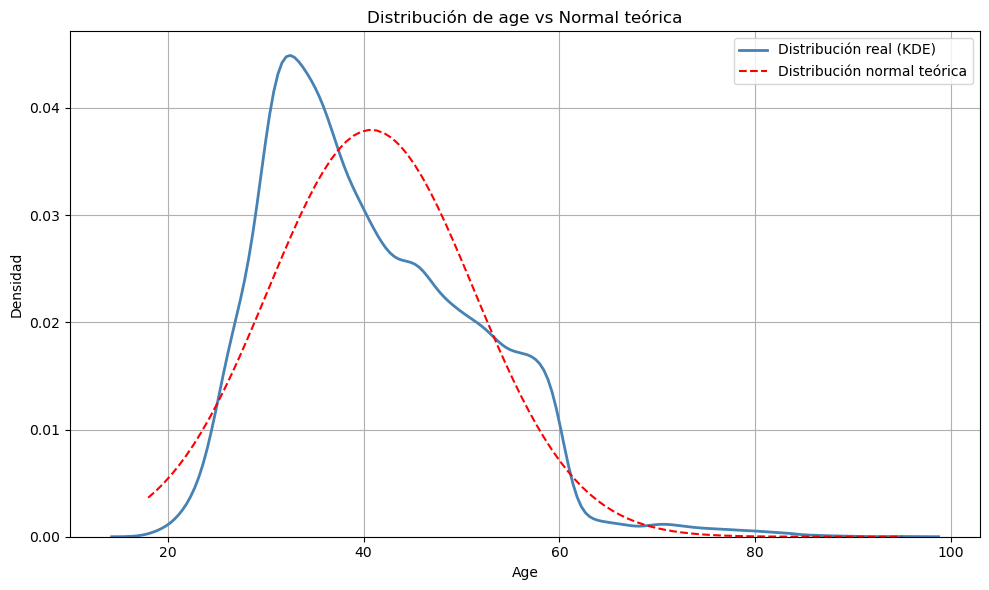

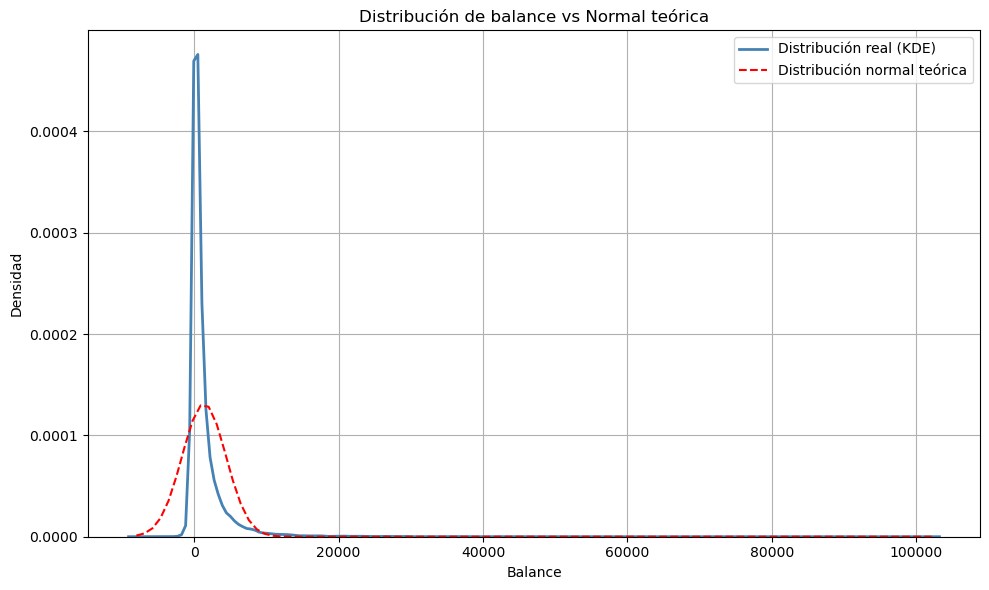

In [38]:
def plot_density(df, columns):
    """ 
    Gr√°fico que refleja la curva de densidad de las variables seleccionadas 
    """
    for column in columns:
        data = df[column]
        mean = data.mean()
        std = data.std()
        x_vals = np.linspace(data.min(), data.max(), 100)
        normal_curve = stats.norm.pdf(x_vals, loc=mean, scale=std)

        plt.figure(figsize=(10, 6))
        sns.kdeplot(data, label='Distribuci√≥n real (KDE)', color='steelblue', linewidth=2)
        plt.plot(x_vals, normal_curve, label='Distribuci√≥n normal te√≥rica', color='red', linestyle='--')
        plt.title(f'Distribuci√≥n de {column} vs Normal te√≥rica')
        plt.xlabel(column.capitalize())
        plt.ylabel('Densidad')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_density(df, ['age', 'balance'])




--Normalidad de la variable age--
Estad√≠stico: 2645.41, p-valor: 0.0
‚ùå Se rechaza la hip√≥tesis nula --> no se comporta como una normal
--Normalidad de la variable balance--
Estad√≠stico: 7593.28, p-valor: 0.0
‚ùå Se rechaza la hip√≥tesis nula --> no se comporta como una normal


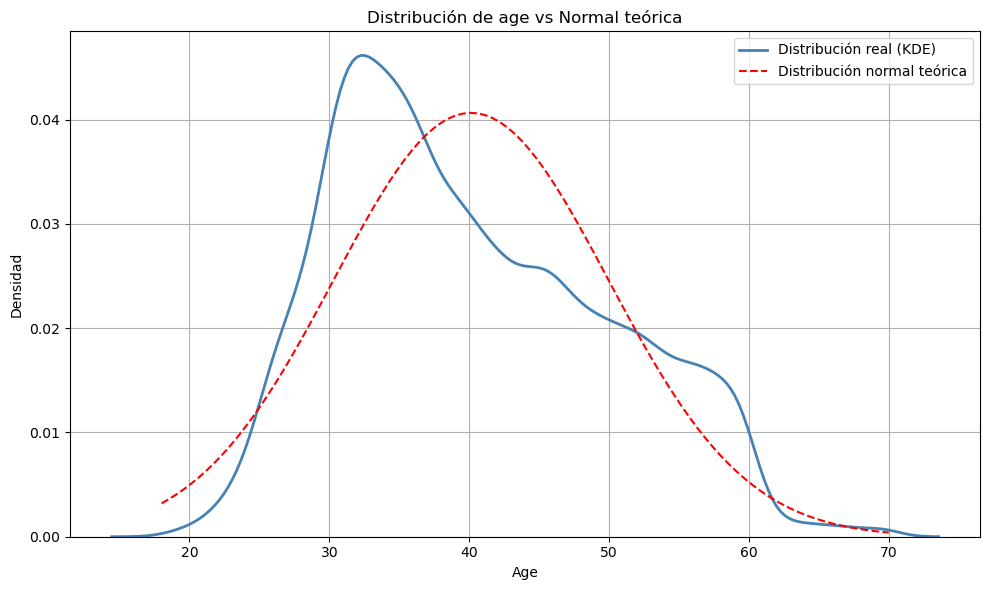

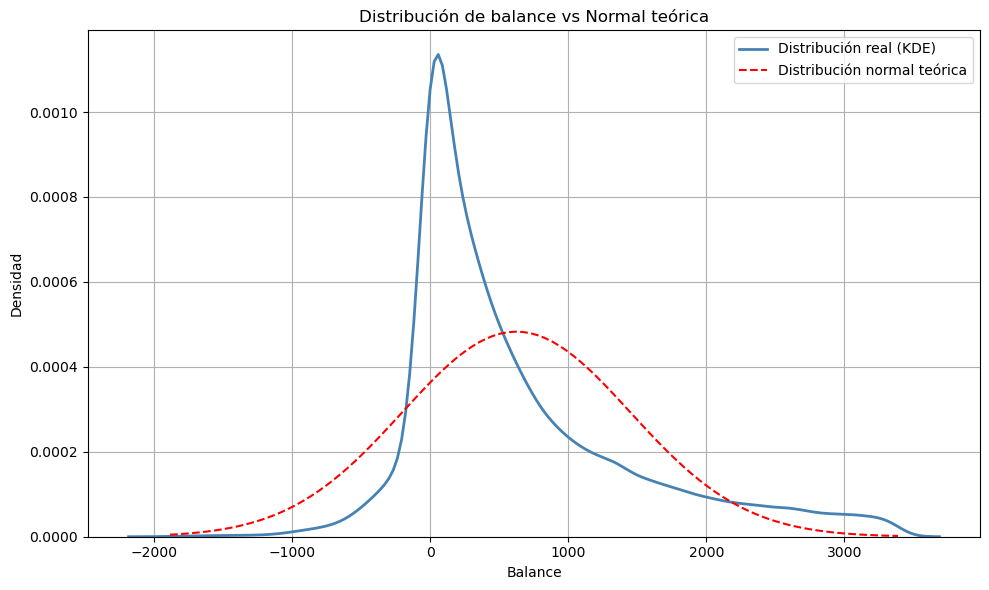

In [48]:
def remove_outliers(df, columns):
    """ 
    Funci√≥n que se encarga de eliminar los valores at√≠picos de las columnas seleccionadas
    """

    for col in columns:
        q1= df[col].quantile(0.25)
        q3= df[col].quantile(0.75)
        iqr= q3 - q1

        lower = q1 - 1.5 * (iqr)
        upper = q3 + 1.5 * (iqr)
        df  = df[(df[col] >= lower) & (df[col] <= upper)]
    return df 

df_sin_outliers = remove_outliers(df, ['age', 'balance'])
normality_test(df_sin_outliers, ['age', 'balance'])
plot_density(df_sin_outliers, ['age', 'balance'])


Contrastes de hip√≥tesis a realizar
1. ¬øEl tipo de trabajo influye en la aceptaci√≥n del producto?‚úÖ
2. ¬øEl nivel educativo influye en la aceptaci√≥n?‚úÖ
2. ¬øEl nivel educativo influye en la aceptaci√≥n?‚úÖ
4. ¬øLa edad media es diferente entre quienes aceptaron y quienes no?‚úÖ 
5. ¬øLa duraci√≥n de la llamada influye? ‚úÖ 
6. ¬øTiene mayor probabilidad de aceptar el dep√≥sito una persona jubilada (retired) que una desempleada (unemployed)?‚úÖ
7. ¬øy una persona jubilada m√°s que un estudiante?‚úÖ
8. ¬øTiene una mayor tasa de aceptaci√≥n un casado con nivel de estudio medio que un soltero de nivel de estudios alto?
9. ¬øLas personas que tienen pr√©stamo personal (loan == 'yes') aceptan m√°s o menos que quienes no?
10. ¬øLas personas con hipoteca (housing == 'yes') tienen menor tasa de aceptaci√≥n?

In [47]:
# 1. ¬øEl tipo de trabajo influye en la aceptaci√≥n del producto? --> Al ser variables categ√≥ricas se debe usar el test de independencia de Chi - cuadrado
""" 
H0: las variables no est√°n relacionadas 
H1: las variables est√°n relacionadas
"""
def chi2_test_dependence(df, col1, col2):
    """ 
        Aplica el test de Chi-cuadrado para evaluar la independencia entre dos variables categ√≥ricas
    """
    table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f'--Test Chi-cuadrado entre {col1} y {col2}--')
    print(f'Estad√≠sico X^2: {chi2.round(2)}')
    print(f'Grados de libertad: {dof}')
    print(f'valor p: {p.round(6)}')

    if p < 0.05:
        print(f'Se rechaza la hip√≥tesis nula: hay evidencia de que las variables no son independientes \n ‚úÖ Por ello, la variable {col1} s√≠ influye en la aceptaci√≥n del producto')
    else:
        print(f'Se acepta la hip√≥tesis nula: hay evidencia suficiente para decir que est√°n relacionadas \n ‚ùå Por ello, la variable {col1} no influye en la aceptaci√≥n del producto')


chi2_test_dependence(df, 'job', 'fixed_term_deposit')
chi2_test_dependence(df, 'marital', 'fixed_term_deposit')
chi2_test_dependence(df, 'education', 'fixed_term_deposit')
chi2_test_dependence(df, 'default', 'fixed_term_deposit')
chi2_test_dependence(df, 'housing', 'fixed_term_deposit')
chi2_test_dependence(df, 'contact', 'fixed_term_deposit')


--Test Chi-cuadrado entre job y fixed_term_deposit--
Estad√≠sico X^2: 772.49
Grados de libertad: 10
valor p: 0.0
Se rechaza la hip√≥tesis nula: hay evidencia de que las variables no son independientes 
 ‚úÖ Por ello, la variable job s√≠ influye en la aceptaci√≥n del producto
--Test Chi-cuadrado entre marital y fixed_term_deposit--
Estad√≠sico X^2: 191.58
Grados de libertad: 2
valor p: 0.0
Se rechaza la hip√≥tesis nula: hay evidencia de que las variables no son independientes 
 ‚úÖ Por ello, la variable marital s√≠ influye en la aceptaci√≥n del producto
--Test Chi-cuadrado entre education y fixed_term_deposit--
Estad√≠sico X^2: 233.4
Grados de libertad: 2
valor p: 0.0
Se rechaza la hip√≥tesis nula: hay evidencia de que las variables no son independientes 
 ‚úÖ Por ello, la variable education s√≠ influye en la aceptaci√≥n del producto
--Test Chi-cuadrado entre default y fixed_term_deposit--
Estad√≠sico X^2: 22.79
Grados de libertad: 1
valor p: 2e-06
Se rechaza la hip√≥tesis nula: hay evi

In [46]:
# ¬øLa edad media es mayor para quienes aceptaron con respecto a los que no?
""" 
H0: la edad media de quienes aceptaron es menor de los que no
H1: la edad media de quienes aceptaron es mayor de quienes no
"""

def t_test_mean_high(df, variable):
    """ 
     Compara si la media de 'variable' es mayor en quienes aceptaron el producto ('yes')
    frente a quienes no ('no'), usando un test t unilateral
    """
    yes = df[df['fixed_term_deposit'] == 'yes'][variable]
    no = df[df['fixed_term_deposit'] == 'no'][variable]

    t, p_dos_colas = stats.ttest_ind(yes, no, equal_var= False)
    p =p_dos_colas / 2 if t > 0 else 1 - (p_dos_colas / 2)  
    print(f'¬øLa media de {variable} es mayor de quienes aceptaron?')
    print(f'Estad√≠stico t: {t.round(2)} | p-valor: {p.round(4)}')

    if p < 0.05:
        print(f'‚úÖ Se rechaza la Hip√≥tesis nula, a un nivel de significaci√≥n del 5% podemos indicar que la media de {variable} es mayor en el grupo que acept√≥')
    else:
        print('‚ùå No se puede rechazar la Hip√≥tesis nula, la edad media es igual o similar a quienes no aceptaron')


t_test_mean_high(df, 'age')


¬øLa media de age es mayor de quienes aceptaron?
Estad√≠stico t: 4.17 | p-valor: 0.0
‚úÖ Se rechaza la Hip√≥tesis nula, a un nivel de significaci√≥n del 5% podemos indicar que la media de age es mayor en el grupo que acept√≥


In [45]:
# ¬øLa duraci√≥n de la llamada influye?
""" 
H0: La media de duraci√≥n de la  llamada es igual en los grupos que aceptaron y los que no.
H1: La media de duraci√≥n de la llamada es diferente entre los que aceptaron y los que no.
"""

def t_test_vars(df, variable):

    """ 
    A trav√©s del estad√≠stico de t test compara si la variable influye o no en la aceptaci√≥n del producto
    """

    yes = df[df['fixed_term_deposit'] == 'yes'][variable]
    no = df[df['fixed_term_deposit'] == 'no'][variable]

    stat_var, p = stats.ttest_ind(yes, no, equal_var=False)

    print(f'Test t para ver si la variable {variable} influye la aceptaci√≥n del producto financierp')
    print(f'Estad√≠stico t: {stat_var.round(3)}')
    print(f'Valor p: {p.round(4)}')

    if p < 0.05:
        print('‚úÖ Se rechaza H‚ÇÄ: La duraci√≥n de la llamada es significativamente diferente entre quienes aceptaron y quienes no.')
    else:
        print('‚ùå No se puede rechazar H‚ÇÄ: No hay evidencia de diferencia en duraci√≥n entre los grupos.')

t_test_vars(df, 'duration')

Test t para ver si la variable duration influye la aceptaci√≥n del producto financierp
Estad√≠stico t: 56.323
Valor p: 0.0
‚úÖ Se rechaza H‚ÇÄ: La duraci√≥n de la llamada es significativamente diferente entre quienes aceptaron y quienes no.


In [44]:
# ¬øTiene mayor probabilidad de aceptar el dep√≥sito una persona jubilada (retired) que una desempleada (unemployed)?

""" 
H0: (nula): La proporci√≥n de aceptaci√≥n es menor o igual en jubilados que en desempleados.
H1: La proporci√≥n de aceptaci√≥n es mayor en jubilados que en desempleados.
"""

def t_test_compare_vars(df, column, group_1, group_2):

    """ 
    Compara si la proporci√≥n de aceptaci√≥n del producto financiero (target) es mayor 
    en la categor√≠a A que en la categor√≠a B de una variable categ√≥rica (group_col) 
    mediante un test de proporciones Z.
    """

    g1 = df[df[column] == group_1]
    g2 = df[df[column] == group_2]

    yes_g1 = len(g1[g1['fixed_term_deposit'] == 'yes'])
    yes_g2 = len(g2[g2['fixed_term_deposit'] == 'yes'])

    total_g1 = len(g1)
    total_g2 = len(g2)

    z, p = proportions_ztest(count=[yes_g1, yes_g2], nobs=[total_g1, total_g2], alternative='larger')

    print(f"---¬ø{group_1} acepta m√°s que {group_2} para la variable {column}?---")
    print(f"z: {z.round(2)} | p-valor: {p.round(4)}") 

    if p < 0.05:
        print(f"‚úÖ Se rechaza H‚ÇÄ: los {group_1} tienen mayor probabilidad de aceptar el producto que {group_2}.")
    else:
        print(f"‚ùå No se rechaza H‚ÇÄ: no hay evidencia suficiente que indique que  acepten m√°s los {group_1} que los {group_2}")

t_test_compare_vars(df, 'job', 'retired', 'unemployed')
t_test_compare_vars(df, 'job', 'management', 'technician')
t_test_compare_vars(df, 'job', 'student', 'unemployed')
t_test_compare_vars(df, 'job', 'blue-collar', 'services')
t_test_compare_vars(df, 'job', 'retired', 'student')
t_test_compare_vars(df, 'job', 'student', 'retired')
t_test_compare_vars(df, 'marital', 'single', 'married')
t_test_compare_vars(df, 'housing', 'no', 'yes')
t_test_compare_vars(df, 'loan', 'yes', 'no')



---¬øretired acepta m√°s que unemployed para la variable job?---
z: 5.03 | p-valor: 0.0
‚úÖ Se rechaza H‚ÇÄ: los retired tienen mayor probabilidad de aceptar el producto que unemployed.
---¬ømanagement acepta m√°s que technician para la variable job?---
z: 4.81 | p-valor: 0.0
‚úÖ Se rechaza H‚ÇÄ: los management tienen mayor probabilidad de aceptar el producto que technician.
---¬østudent acepta m√°s que unemployed para la variable job?---
z: 7.38 | p-valor: 0.0
‚úÖ Se rechaza H‚ÇÄ: los student tienen mayor probabilidad de aceptar el producto que unemployed.
---¬øblue-collar acepta m√°s que services para la variable job?---
z: -2.91 | p-valor: 0.9982
‚ùå No se rechaza H‚ÇÄ: no hay evidencia suficiente que indique que  acepten m√°s los blue-collar que los services
---¬øretired acepta m√°s que student para la variable job?---
z: -3.61 | p-valor: 0.9998
‚ùå No se rechaza H‚ÇÄ: no hay evidencia suficiente que indique que  acepten m√°s los retired que los student
---¬østudent acepta m√°s que

In [43]:
# ¬øTiene una mayor tasa de aceptaci√≥n un casado con nivel de estudio medio que un soltero de nivel de estudios alto?

""" 
H0: La tasa de aceptaci√≥n del producto es igual o menor en casados con nivel medio de estudios que en solteros con nivel alto 
H1: La tasa de aceptaci√≥n  del producto es mayor en casados con nivel medio que en solteros con nivel alto
"""

def test_compare_groups(df, col1, val1, col2, val2, col3, val3, col4, val4):
    """
    Compara si la tasa de aceptaci√≥n del producto ('yes' en 'fixed_term_deposit')
    es mayor en un grupo A (col1=val1 y col2=val2) que en un grupo B (col3=val3 y col4=val4),
    usando un test de proporciones Z.

    Par√°metros:
    -----------
    df : DataFrame
    col1, val1 : primera condici√≥n del grupo A
    col2, val2 : segunda condici√≥n del grupo A
    col3, val3 : primera condici√≥n del grupo B
    col4, val4 : segunda condici√≥n del grupo B
    """

    group_a = df[(df[col1] == val1) & (df[col2] == val2)]
    group_b = df[(df[col3] == val3) & (df[col4] == val4)]

    a_yes = (group_a['fixed_term_deposit'] == 'yes').sum()
    b_yes = (group_b['fixed_term_deposit'] == 'yes').sum()

    a_total = len(group_a)
    b_total =len(group_b)

    z, p = proportions_ztest([a_yes, b_yes], [a_total, b_total], alternative= 'larger')
    print(f"---Comparando:\n * A: {col1} = {val1}, {col2} = {val2}\n * B: {col3} = {val3}, {col4} = {val4}---")
    print(f"Z = {z.round(2)} | p = {p.round(4)}")

    if p < 0.05: 
        print(f'‚úÖ Se rechaza la H0: El grupo {val1}, {val2} tiene una mayor probabilidad de aceptar que el grupo {val3}, {val4}')
    else:
        print(f'‚ùå Se acepta la H0: la aceptaci√≥n del producto para el grupo {val1}, {val2} es igual o menor que para el grupo {val3}, {val4}')

test_compare_groups(df,
                    'marital', 'married',
                    'education_level', 'High School/VET',
                    'marital', 'single',
                    'education_level', 'Grade/Higher VET')

test_compare_groups(df, 
                    'marital', 'married', 
                    'education_level', 'High School/VET',
                    'marital', 'divorced',
                    'education_level', 'Primary'
                    )

test_compare_groups(df, 
                    'marital', 'divorced', 
                    'education_level', 'Primary',
                    'marital', 'married',
                    'education_level', 'High School/VET'
                    )

test_compare_groups(df, 
                    'marital', 'married', 
                    'education_level', 'Grade/Higher VET',
                    'marital', 'divorced',
                    'education_level', 'Grade/Higher VET'
                    )

test_compare_groups(df, 
                    'marital', 'married', 
                    'education_level', 'Grade/Higher VET',
                    'marital', 'divorced',
                    'education_level', 'Primary'
                    )

test_compare_groups(df, 
                    'marital', 'married', 
                    'education_level', 'Grade/Higher VET',
                    'marital', 'single',
                    'education_level', 'Primary'
                    )

test_compare_groups(df, 
                    'marital', 'married', 
                    'education_level', 'Grade/Higher VET',
                    'marital', 'married',
                    'education_level', 'Primary'
                    )
test_compare_groups(df, 
                    'marital', 'single', 
                    'education_level', 'Grade/Higher VET',
                    'marital', 'single',
                    'education_level', 'Primary'
                    )

---Comparando:
 * A: marital = married, education_level = High School/VET
 * B: marital = single, education_level = Grade/Higher VET---
Z = -16.43 | p = 1.0
‚ùå Se acepta la H0: la aceptaci√≥n del producto para el grupo married, High School/VET es igual o menor que para el grupo single, Grade/Higher VET
---Comparando:
 * A: marital = married, education_level = High School/VET
 * B: marital = divorced, education_level = Primary---
Z = -4.0 | p = 1.0
‚ùå Se acepta la H0: la aceptaci√≥n del producto para el grupo married, High School/VET es igual o menor que para el grupo divorced, Primary
---Comparando:
 * A: marital = divorced, education_level = Primary
 * B: marital = married, education_level = High School/VET---
Z = 4.0 | p = 0.0
‚úÖ Se rechaza la H0: El grupo divorced, Primary tiene una mayor probabilidad de aceptar que el grupo married, High School/VET
---Comparando:
 * A: marital = married, education_level = Grade/Higher VET
 * B: marital = divorced, education_level = Grade/Higher 

In [39]:
""" 
Nos muestra que por grupos de estado civil, en funci√≥n de su nivel de estudios no hay mucha diferenciaci√≥n de aceptaci√≥n del producto entre un nivel superior de estudios
pero si hay diferencia entre los distintos estados civiles y el nivel de estuidos mayor y b√°sico tanto entre ellos como para su mismo estado civil
"""

' \nNos muestra que por grupos de estado civil, en funci√≥n de su nivel de estudios no hay mucha diferenciaci√≥n de aceptaci√≥n del producto entre un nivel superior de estudios\npero si hay diferencia entre los distintos estados civiles y el nivel de estuidos mayor y b√°sico tanto entre ellos como para su mismo estado civil\n'

In [42]:
df.to_csv('../data/processed/Bank_FTD.csv', index= False)